
# Import packages and directories necessary for this book

In [73]:
import sys
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
# from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/drive/MyDrive/ColabNotebooks/modules')
import drive.MyDrive.ColabNotebooks.modules.helperFunctions

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocess the Data into a workable DataFrame

## Import the hepler functions and process the data

In [74]:
# Import the support function "readFile". This function takes as an argument a .cvs file or the route to the file, imports and transforms it into a Pandas DataFrame, returning the loaded DataFrame
from drive.MyDrive.ColabNotebooks.modules.helperFunctions import readFile

# Import the support function "cleanMissingValues". This function takes the DataFrame as an argument and returns the same DataFrame with a treatment for the missing values. 
from drive.MyDrive.ColabNotebooks.modules.helperFunctions import cleanMissingValues

# Import the support function "cleanDataFrame". This function takes in the previous DataFrame and returns another DataFrame whit just the features and target, rearanged in a new better comprehensive column order.
from drive.MyDrive.ColabNotebooks.modules.helperFunctions import cleanDataFrame

# Import the support function "convertCategories". This function takes in the previous DataFrame and returns another with new categorization for some of the features. 
from drive.MyDrive.ColabNotebooks.modules.helperFunctions import convertCategories

# Import "useLabelEncoder". This function takes in the DataFrame and applies sklearn labelEncoder to finis formating the DataFrame
from drive.MyDrive.ColabNotebooks.modules.helperFunctions import useLabelEncoder

In [75]:
# Read the .csv file and assigns the name "df" to it.
# After that, we apply the support functions to the DataFrame in order to ger a new df ready to work with in the next ML algorithms

file = 'drive/MyDrive/ColabNotebooks/data/VPD_lowerMainLand.csv'
df = readFile(file)
df = cleanMissingValues(df)
df = cleanDataFrame(df)
df = convertCategories(df)
df.head(5)

,Month,Weather,Light,Alcohol Involved,Drug Involved,Fell Asleep,Cyclist Involved,Pedestrian Involved,Motorcycle Involved,Land Use,Speed Advisory,Traffic Control,Traffic Flow,Road Class,Road Character,Road Condition,Road Surface,Crash Type
0,10,0,0,0,0,0,0,0,0,0,0,7,1,0,0,1,1,1
1,2,0,0,0,0,0,0,0,0,1,0,5,1,1,0,0,0,0
2,6,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,9,0,0,0,0,0,0,0,0,5,0,0,1,1,0,0,0,1
4,8,0,1,0,0,0,0,0,0,0,0,0,1,1,1,6,0,1


In [76]:
# We check for the shape of our preprocessed data
df.shape

(91868, 18)

## Start defining the "X" and "y" for the MixMax escaled dfX dfy and the same for the dummy variables

### For the regular variables

In [77]:
# Here we select the features columns for the dfX and the target column for the dfy

# dfX is equal to all the features minus the target variable.
dfX = df.drop(['Crash Type'],axis=1)

# dfy is equal to just the target variable "Crash Type"
dfy = df['Crash Type']

### For the dummy variables

In [78]:
# Here we select the features columns for the dfdummyX and the target column for the dfdummyy.

# This time, we use the method "get_dummies" from Pandas so we can transform all the non-binary categories into a dummy representation of each feature.
dfdummyX = df.drop(['Crash Type'],axis=1)
dfdummyX = pd.get_dummies(data=dfdummyX, columns=['Month',
                                            'Weather',
                                            'Light',
                                            'Land Use',
                                            'Speed Advisory',
                                            'Traffic Control',
                                            'Traffic Flow',
                                            'Road Class',
                                            'Road Character',
                                            'Road Condition',
                                            'Road Surface',
                                            ])
dfdummyy = df['Crash Type']

## Create the train and test sets for the scled and dummy variables

### For the regular variables

In [79]:
# Now it's time to instantiate "train_test_split" class and transform dfX and dfy into the train and test sets.
# We are using a ratio of 70% for training and 30% for testing.
# Split the dfX in two equal parts
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=0)

### For the dummy variables

In [80]:
# The same goes for the dummy X and y sets. Instantiate "train_test_split" class and transform dfdummyX and dfdummyy into the train and test sets.
# We are using a ratio of 70% for training and 30% for testing.
# Split the dfdummyX into train and test datasets.
dummyX_train, dummyX_test, dummyy_train, dummyy_test = train_test_split(dfdummyX, dfdummyy, test_size=0.2, random_state=0)

## Scale the categorical data using MinMax escaler, so we can end up with a range of [0-1] for all the categorical data

In [81]:
# Here we instantiate a scaler using MinMaxScaler
scaler = MinMaxScaler()

# Fit on training and test sets
scaler.fit(X_train)
scaler.fit(X_test)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Start the models

## Keras Model, scaled dfX and dfy - 66.81%

### Define model

In [82]:
X_train.shape

(73494, 17)

In [68]:
# define the keras model
model = Sequential()
model.add(Dense(17, input_dim=17, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compile model

In [83]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['BinaryAccuracy'])

### Fit model

In [84]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=200, batch_size=200)

Epoch 1/200
368/368 [==============================] - 1s 2ms/step - loss: 0.5844 - binary_accuracy: 0.6686
Epoch 2/200
368/368 [==============================] - 1s 2ms/step - loss: 0.5840 - binary_accuracy: 0.6681
Epoch 3/200
368/368 [==============================] - 1s 2ms/step - loss: 0.5842 - binary_accuracy: 0.6698
Epoch 4/200
368/368 [==============================] - 1s 2ms/step - loss: 0.5844 - binary_accuracy: 0.6700
Epoch 5/200
368/368 [==============================] - 1s 2ms/step - loss: 0.5842 - binary_accuracy: 0.6681
Epoch 6/200
368/368 [==============================] - 1s 2ms/step - loss: 0.5845 - binary_accuracy: 0.6678
Epoch 7/200
368/368 [==============================] - 1s 2ms/step - loss: 0.5843 - binary_accuracy: 0.6692
Epoch 8/200
368/368 [==============================] - 1s 2ms/step - loss: 0.5841 - binary_accuracy: 0.6695
Epoch 9/200
368/368 [==============================] - 1s 2ms/step - loss: 0.5843 - binary_accuracy: 0.6683
Epoch 10/200
368/368 [======

In [89]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

# 866/866 [==============================] - 1s 754us/step - loss: 0.5911 - accuracy: 0.6589
# Accuracy: 65.89

# test score for nn with NO preprocessing.LabelEncoder() after data engeneering, bs:10
# 866/866 [==============================] - 1s 1ms/step - loss: 0.5980 - accuracy: 0.6587
# Accuracy: 65.87

# test score for nn with preprocessing.LabelEncoder() after data engeneering, bs:50
# 866/866 [==============================] - 1s 1ms/step - loss: 0.5984 - accuracy: 0.6604
# Accuracy: 66.04

# test score for nn with preprocessing.LabelEncoder() after data engeneering, bs:100
# 866/866 [==============================] - 1s 1ms/step - loss: 0.5986 - accuracy: 0.6592
# Accuracy: 65.92

# test score for nn with preprocessing.LabelEncoder() after data engeneering, bs:150
# 866/866 [==============================] - 1s 1ms/step - loss: 0.5990 - accuracy: 0.6596
# Accuracy: 65.96

# test score for nn with preprocessing.LabelEncoder() after data engeneering, bs:200 with new layers
# 866/866 [==============================] - 1s 1ms/step - loss: 0.5971 - accuracy: 0.6599
# Accuracy: 65.99

# test score for nn with preprocessing.LabelEncoder() after data engeneering, bs:200 with new layers and scaledX
# 866/866 [==============================] - 2s 2ms/step - loss: 0.5977 - accuracy: 0.6581
# Accuracy: 65.81

# test score for nn with preprocessing.LabelEncoder() after data engeneering, bs:50 with new layers and new scaledX with MinMax
# 866/866 [==============================] - 1s 1ms/step - loss: 0.5979 - accuracy: 0.6609
# Accuracy: 66.09

# test score for nn with preprocessing.LabelEncoder() after data engeneering, bs:100 with new layers and new scaledX with MinMax
# 866/866 [==============================] - 1s 1ms/step - loss: 0.5989 - accuracy: 0.6598
# Accuracy: 65.98

# test score for nn with preprocessing.LabelEncoder() after data engeneering, bs:150 with new layers and new scaledX with MinMax
# 866/866 [==============================] - 1s 1ms/step - loss: 0.5993 - accuracy: 0.6598
# Accuracy: 65.98

# test score for nn with preprocessing.LabelEncoder() after data engeneering, bs:150 with new layers and new scaledX with MinMax and new BinaryAccuracy
# 866/866 [==============================] - 1s 1ms/step - loss: 0.5993 - binary_accuracy: 0.6410
# Accuracy: 66.81

# test score for nn with preprocessing.LabelEncoder() after data engeneering, bs:1000 with new layers and new scaledX with MinMax and new BinaryAccuracy
# 866/866 [==============================] - 1s 1ms/step - loss: 0.5971 - binary_accuracy: 0.6588
# Accuracy: 65.88

# test score for nn with preprocessing.LabelEncoder() after data engeneering, bs:350 with new layers and new scaledX with MinMax and new BinaryAccuracy
# 866/866 [==============================] - 1s 1ms/step - loss: 0.5969 - binary_accuracy: 0.6612
# Accuracy: 66.12

# test score for nn with preprocessing.LabelEncoder() after data engeneering, bs:350 with new layers and new scaledX with MinMax and new BinaryAccuracy
# 866/866 [==============================] - 1s 1ms/step - loss: 0.5979 - binary_accuracy: 0.6604
# Accuracy: 66.10

# 575/575 [==============================] - 1s 1ms/step - loss: 0.5927 - binary_accuracy: 0.6607
# Accuracy: 66.07

575/575 [==============================] - 1s 1ms/step - loss: 0.5924 - binary_accuracy: 0.6601
Accuracy: 66.01


In [90]:
score = model.evaluate(X_test, y_test,verbose=2)
print(score)

575/575 - 1s - loss: 0.5924 - binary_accuracy: 0.6601
[0.5924301743507385, 0.6601175665855408]


## Keras Model, scaled dfX and dfy (PCA) 65.51%

### Prepare original df for PCA

In [14]:
scaler = MinMaxScaler()
scaled_df=df.copy()
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)
scaled_df.head(3)

,Month,Weather,Light,Alcohol Involved,Drug Involved,Fell Asleep,Cyclist Involved,Pedestrian Involved,Motorcycle Involved,Land Use,Speed Advisory,Traffic Control,Traffic Flow,Road Class,Road Character,Road Condition,Road Surface,Crash Type
0,0.909091,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.7,0.5,0.000,0.000000,0.166667,0.142857,1.0
1,0.181818,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.5,0.5,0.125,0.000000,0.000000,0.000000,0.0
2,0.545455,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.5,0.000,0.166667,0.000000,0.000000,0.0


In [15]:
dfX = scaled_df.drop(['Crash Type'],axis=1)
dfy = scaled_df['Crash Type']

In [16]:
pca = PCA(n_components=7)

Principal_components=pca.fit_transform(dfX)
Principal_components=pca.fit_transform(dfX)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7'])
pca_df.head(3)

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7
0,0.255348,0.378692,-0.122196,-0.111752,-0.249817,0.076955,-0.455311
1,0.134316,-0.348295,-0.098154,-0.073955,-0.102878,0.048620,-0.277809
2,-0.370397,0.051372,0.099557,0.017753,-0.205545,-0.146107,-0.135638


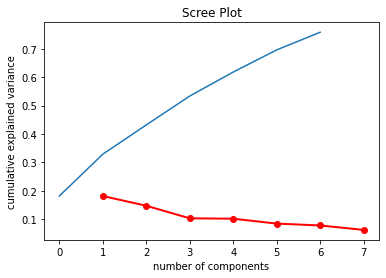

In [17]:

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.show()

In [18]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.18144885 0.14736716 0.10304885 0.10169248 0.0844846  0.07789282
 0.0622212 ]
Cumulative Prop. Variance Explained:  [0.18144885 0.328816   0.43186485 0.53355734 0.61804194 0.69593476
 0.75815597]


In [19]:
print(pca.explained_variance_) 

[0.12795071 0.10391762 0.07266607 0.07170961 0.05957528 0.05492701
 0.04387599]


In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7'], index=dfX.columns)
loadings

In [21]:
# Split the dfcatX in two equal parts
pcaX_train, pcaX_test, pcay_train, pcay_test = train_test_split(pca_df, dfy, test_size=0.3, random_state=123)

In [47]:
# # Here we instantiate a scaler using MinMaxScaler
# scaler = MinMaxScaler()

# # Fit on training and test sets
# scaler.fit(pcaX_train)
# scaler.fit(pcaX_test)

# # Apply transform to both the training set and the test set.
# pcaX_train = scaler.transform(pcaX_train)
# pcaX_test = scaler.transform(pcaX_test)

### Define model using pca df

In [22]:
pcaX_train.shape

(64307, 7)

In [23]:
# define the keras model
model = Sequential()
model.add(Dense(15, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compile model

In [24]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['BinaryAccuracy'])

### Fit model

In [25]:
# fit the keras model on the dataset
model.fit(pcaX_train, pcay_train, epochs=150, batch_size=200)

Epoch 1/150
322/322 [==============================] - 1s 2ms/step - loss: 0.6675 - binary_accuracy: 0.6012
Epoch 2/150
322/322 [==============================] - 1s 2ms/step - loss: 0.6368 - binary_accuracy: 0.6153
Epoch 3/150
322/322 [==============================] - 1s 2ms/step - loss: 0.6301 - binary_accuracy: 0.6181
Epoch 4/150
322/322 [==============================] - 1s 2ms/step - loss: 0.6249 - binary_accuracy: 0.6247
Epoch 5/150
322/322 [==============================] - 1s 2ms/step - loss: 0.6215 - binary_accuracy: 0.6323
Epoch 6/150
322/322 [==============================] - 1s 2ms/step - loss: 0.6194 - binary_accuracy: 0.6353
Epoch 7/150
322/322 [==============================] - 1s 2ms/step - loss: 0.6179 - binary_accuracy: 0.6397
Epoch 8/150
322/322 [==============================] - 1s 2ms/step - loss: 0.6168 - binary_accuracy: 0.6400
Epoch 9/150
322/322 [==============================] - 1s 2ms/step - loss: 0.6158 - binary_accuracy: 0.6423
Epoch 10/150
322/322 [======

In [28]:
# evaluate the keras model
_, accuracy = model.evaluate(pcaX_test, pcay_test)
print('Accuracy: %.2f' % (accuracy*100))

# # test score for nn with preprocessing.LabelEncoder() after data engeneering and PCA, bs:50 with new layers and scaledX_PCA
# 866/866 [==============================] - 1s 1ms/step - loss: 0.7346 - accuracy: 0.5305
# Accuracy: 53.05

# 706/706 [==============================] - 1s 852us/step - loss: 0.6085 - binary_accuracy: 0.6422
# Accuracy: 64.22

# 706/706 [==============================] - 1s 1ms/step - loss: 0.6095 - binary_accuracy: 0.6430
# Accuracy: 64.30

# 706/706 [==============================] - 1s 878us/step - loss: 0.6050 - binary_accuracy: 0.6449
# Accuracy: 64.49

# # test score for nn with preprocessing.LabelEncoder() after data engeneering and PCA, bs:150 with new layers and scaledX_PCA
# 862/862 [==============================] - 1s 2ms/step - loss: 0.6038 - binary_accuracy: 0.6509
# Accuracy: 65.09

862/862 [==============================] - 1s 1ms/step - loss: 0.5958 - binary_accuracy: 0.6551
Accuracy: 65.51


In [29]:
score = model.evaluate(pcaX_test, pcay_test,verbose=2)
print(score)

862/862 - 1s - loss: 0.5958 - binary_accuracy: 0.6551
[0.5957702398300171, 0.6551285982131958]


## Keras Model, dummy dfX and dfy - 65.35%

### Define model

In [30]:
dummyX_train.shape

(73494, 95)

In [31]:
# define the keras model
model = Sequential()
model.add(Dense(17, input_dim=95, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compile model

In [32]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['BinaryAccuracy'])

### Fit model

In [33]:
# fit the keras model on the dataset
model.fit(dummyX_train, dummyy_train, epochs=200, batch_size=200)

Epoch 1/200
368/368 [==============================] - 1s 2ms/step - loss: 0.6508 - binary_accuracy: 0.6360
Epoch 2/200
368/368 [==============================] - 1s 2ms/step - loss: 0.6088 - binary_accuracy: 0.6649
Epoch 3/200
368/368 [==============================] - 1s 2ms/step - loss: 0.6015 - binary_accuracy: 0.6674
Epoch 4/200
368/368 [==============================] - 1s 2ms/step - loss: 0.5982 - binary_accuracy: 0.6680
Epoch 5/200
368/368 [==============================] - 1s 2ms/step - loss: 0.5954 - binary_accuracy: 0.6693
Epoch 6/200
368/368 [==============================] - 1s 2ms/step - loss: 0.5939 - binary_accuracy: 0.6694
Epoch 7/200
368/368 [==============================] - 1s 2ms/step - loss: 0.5924 - binary_accuracy: 0.6705
Epoch 8/200
368/368 [==============================] - 1s 2ms/step - loss: 0.5907 - binary_accuracy: 0.6703
Epoch 9/200
368/368 [==============================] - 1s 2ms/step - loss: 0.5898 - binary_accuracy: 0.6695
Epoch 10/200
368/368 [======

In [35]:
# # save the model to disk
# filename = 'drive/MyDrive/ColabNotebooks/data/mlp_nn_nscaled_150.pkl'
# pickle.dump(model, open(filename, 'wb'))

In [36]:
# # # load the model from disk
# nn_150 = pickle.load(open(filename, 'rb'))
# result = nn_150.score(X_test, y_test)
# print(result)

In [37]:
# evaluate the keras model
_, accuracy = model.evaluate(dummyX_test, dummyy_test)
print('Accuracy: %.2f' % (accuracy*100))


575/575 [==============================] - 1s 1ms/step - loss: 0.6025 - binary_accuracy: 0.6535
Accuracy: 65.35


In [38]:
score = model.evaluate(dummyX_test, dummyy_test,verbose=2)
print(score)

575/575 - 1s - loss: 0.6025 - binary_accuracy: 0.6535
[0.6025296449661255, 0.6535321474075317]


## Keras Model, dummy dfX and dfy (PCA) - 65.48%

### Prepare original df for PCA

In [95]:
scaler = MinMaxScaler()
scaled_df=df.copy()
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)
scaled_df.head(3)

,Month,Weather,Light,Alcohol Involved,Drug Involved,Fell Asleep,Cyclist Involved,Pedestrian Involved,Motorcycle Involved,Land Use,Speed Advisory,Traffic Control,Traffic Flow,Road Class,Road Character,Road Condition,Road Surface,Crash Type
0,0.909091,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.7,0.5,0.000,0.000000,0.166667,0.142857,1.0
1,0.181818,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.5,0.5,0.125,0.000000,0.000000,0.000000,0.0
2,0.545455,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.5,0.000,0.166667,0.000000,0.000000,0.0


In [96]:
dfX = scaled_df.drop(['Crash Type'],axis=1)
dfy = scaled_df['Crash Type']

In [97]:
pca = PCA(n_components=8)

Principal_components=pca.fit_transform(dfdummyX)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8'])
pca_df.head(3)

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8
0,0.221483,0.030759,-0.372805,-0.523802,-0.432552,0.835167,-0.478128,-0.471029
1,-0.841073,0.310279,-0.083248,-0.153527,0.937834,-0.341171,-0.260698,-0.087546
2,-0.176472,-1.019920,0.204061,0.969113,-0.687045,0.263740,-0.044123,0.408466


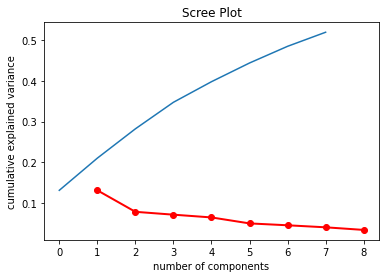

In [98]:

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.show()

In [99]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.13158689 0.07888133 0.07186836 0.06510777 0.05045871 0.04586253
 0.0408902  0.03449801]
Cumulative Prop. Variance Explained:  [0.13158689 0.21046822 0.28233658 0.34744435 0.39790306 0.4437656
 0.48465579 0.5191538 ]


In [100]:
print(pca.explained_variance_) 

[0.72996609 0.4375869  0.39868309 0.36117933 0.27991503 0.25441815
 0.22683459 0.19137451]


In [101]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8'], index=dfdummyX.columns)
loadings

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8
Alcohol Involved,0.016218,-0.050295,-0.005488,0.092540,0.010282,-0.011923,1.943677e-02,0.004967
Drug Involved,-0.000214,-0.007902,0.001557,0.009547,0.002816,-0.001392,2.173214e-03,-0.002644
Fell Asleep,-0.000389,-0.009831,0.008492,0.005985,-0.002808,-0.006754,3.685425e-03,0.002845
Cyclist Involved,-0.015789,-0.005079,-0.011840,-0.011095,0.004815,0.000854,-4.726409e-03,-0.012361
Pedestrian Involved,0.008328,0.028577,-0.054401,0.018877,0.030310,0.004659,-1.773587e-02,-0.049375
Motorcycle Involved,-0.018920,-0.007446,0.006599,-0.006721,-0.000536,-0.008243,-7.107046e-03,0.011076
Month_0,0.051526,0.001596,-0.007929,0.026497,0.001246,-0.005266,2.110205e-02,-0.006545
Month_1,0.029038,-0.000218,0.003586,0.010376,0.004227,-0.006356,3.663563e-02,0.004795
Month_2,0.012575,0.009205,0.001722,-0.010994,0.001014,-0.001797,-1.568556e-03,-0.002093
Month_3,-0.015934,0.003177,0.003356,-0.024834,0.001882,0.000545,7.988189e-03,-0.004295


In [51]:
# Split the dfcatX in two equal parts
pcaX_train, pcaX_test, pcay_train, pcay_test = train_test_split(pca_df, dfy, test_size=0.3, random_state=123)

### Define model using pca df

In [53]:
pcaX_train.shape

(64307, 7)

In [54]:
# define the keras model
model = Sequential()
model.add(Dense(15, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compile model

In [55]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['BinaryAccuracy'])

### Fit model

In [56]:
# fit the keras model on the dataset
model.fit(pcaX_train, pcay_train, epochs=200, batch_size=200)

Epoch 1/200
322/322 [==============================] - 1s 2ms/step - loss: 0.6689 - binary_accuracy: 0.5916
Epoch 2/200
322/322 [==============================] - 1s 2ms/step - loss: 0.6422 - binary_accuracy: 0.6113
Epoch 3/200
322/322 [==============================] - 1s 2ms/step - loss: 0.6377 - binary_accuracy: 0.6130
Epoch 4/200
322/322 [==============================] - 1s 2ms/step - loss: 0.6351 - binary_accuracy: 0.6150
Epoch 5/200
322/322 [==============================] - 1s 2ms/step - loss: 0.6329 - binary_accuracy: 0.6157
Epoch 6/200
322/322 [==============================] - 1s 2ms/step - loss: 0.6313 - binary_accuracy: 0.6161
Epoch 7/200
322/322 [==============================] - 1s 2ms/step - loss: 0.6296 - binary_accuracy: 0.6179
Epoch 8/200
322/322 [==============================] - 1s 2ms/step - loss: 0.6279 - binary_accuracy: 0.6176
Epoch 9/200
322/322 [==============================] - 1s 2ms/step - loss: 0.6271 - binary_accuracy: 0.6211
Epoch 10/200
322/322 [======

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(pcaX_test, pcay_test)
print('Accuracy: %.2f' % (accuracy*100))

# # test score for nn with preprocessing.LabelEncoder() after data engeneering and PCA, bs:50 with new layers and scaledX_PCA
# 866/866 [==============================] - 1s 1ms/step - loss: 0.7346 - accuracy: 0.5305
# Accuracy: 53.05

# 706/706 [==============================] - 1s 852us/step - loss: 0.6085 - binary_accuracy: 0.6422
# Accuracy: 64.22

# 706/706 [==============================] - 1s 1ms/step - loss: 0.6095 - binary_accuracy: 0.6430
# Accuracy: 64.30

# 706/706 [==============================] - 1s 878us/step - loss: 0.6050 - binary_accuracy: 0.6449
# Accuracy: 64.49

# # test score for nn with preprocessing.LabelEncoder() after data engeneering and PCA, bs:150 with new layers and scaledX_PCA
# 862/862 [==============================] - 1s 2ms/step - loss: 0.6038 - binary_accuracy: 0.6509
# Accuracy: 65.09

# 7 pca
# 862/862 [==============================] - 1s 1ms/step - loss: 0.6593 - binary_accuracy: 0.5993
# Accuracy: 59.93

# 862/862 [==============================] - 1s 1ms/step - loss: 0.5958 - binary_accuracy: 0.6548
# Accuracy: 65.48

In [ ]:
score = model.evaluate(pcaX_test, pcay_test,verbose=2)
print(score)

# 862/862 - 1s - loss: 0.5958 - binary_accuracy: 0.6548
# [0.5958320498466492, 0.6548383831977844]